# Global mean Sea Surface Temperatures

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import platform
import os

import pyproj
from shapely.geometry import Polygon, Point
from shapely.ops import transform

plt.rcParams['figure.figsize'] = (10, 4)

In [13]:
def point_in_polygon(lon, lat, polygon):
    point = Point(lon, lat)
    return polygon.contains(point)
    

In [14]:
# Define a transformation to ensure the polygon's CRS matches
def transform_polygon(polygon, src_crs='epsg:4326', tgt_crs='epsg:4326'):
    # Transform the polygon to match the DataArray CRS if needed
    proj = pyproj.Transformer.from_proj(pyproj.Proj(src_crs), pyproj.Proj(tgt_crs), always_xy=True)
    return transform(lambda x, y: proj.transform(x, y), polygon)

#### Settings

In [3]:
year1=1982
year2=1992

In [4]:
#To compute de climatoloy
yearC1='1982'
yearC2='1992'

## Load data

In [8]:
HOME=os.environ['HOME']   
f = open(HOME+'/.env', 'r')
for line in f.readlines():
    Name=line.strip().split('=')[0]
    Content=line.strip().split('=')[-1]
    if Name=='dirData' or Name=='dirAnalisis':
        exec(Name + "=" + "'" + Content + "'")
f.close()

In [9]:
if os.uname().nodename.lower().find('eemmmbp') != -1:
    base_file = dirData + '/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
    dataDir   = dirAnalisis + '/SSTGlobalAnalysis/data'
elif os.uname().nodename.lower().find('sagams') != -1:
    base_file = dirData + '/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
    dataDir   = dirAnalisis + '/SSTGlobalAnalysis/data'
elif os.uname().nodename.lower().find('rossby') != -1:
    base_file = dirData + '/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
    dataDir   = dirAnalisis + '/SSTGlobalAnalysis/data'

In [10]:
files = [f'{base_file}.{year}.nc' for year in range(year1, year2+1)]
DS = xr.open_mfdataset(files)

In [11]:
# Load data1

#titulo_short = 'NH'
#titulo = 'Northern hemisphere'
#sst = DS.sst.sel(lat=slice(0,80))

#titulo_short = 'SH'
#titulo = 'Southern hemisphere'
#sst = DS.sst.sel(lat=slice( -80, 0))

titulo_short = 'NAtl'
titulo = 'North Atlantic'
sst = DS.sst.sel(lat = slice( 0, 80), lon = slice( 260, 360))

#titulo_short = 'NTenerife'
#titulo = 'North Tenerife'
#sst = DS.sst.sel(lon=slice(360-16.,360-15.),lat=slice(28.50,28.75))

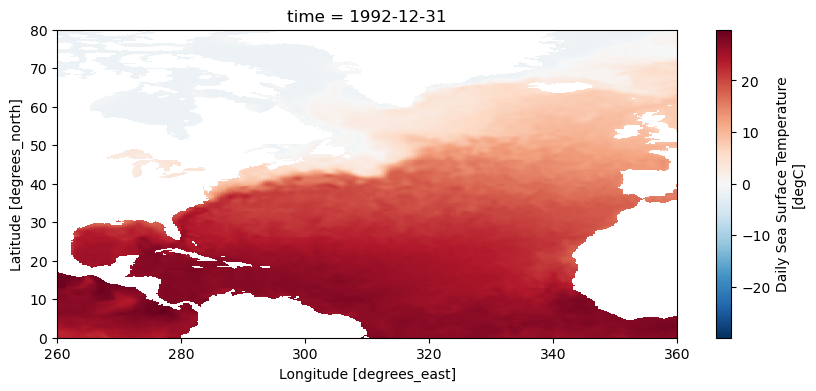

In [12]:
sst[-1,:,:].plot()

In [24]:
#Quito el med
lat_point_list = [40, 40, 30, 30, 40]
lon_point_list = [354.5, 360, 360, 354.5, 354.5]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
polygon = transform_polygon(polygon_geom)
mask = np.array([[point_in_polygon(lon,lat,polygon) 
                  for lon in sst.lon.values] 
                  for lat in sst.lat.values])
        
sst = sst.where(~mask)


#Quito el pacifico 
lat_point_list = [20,  10,  0, 0, 20]
lon_point_list = [260, 285, 285, 260,260]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
polygon = transform_polygon(polygon_geom)
mask = np.array([[point_in_polygon(lon,lat,polygon) 
                  for lon in sst.lon.values] 
                  for lat in sst.lat.values])
        
sst = sst.where(~mask)



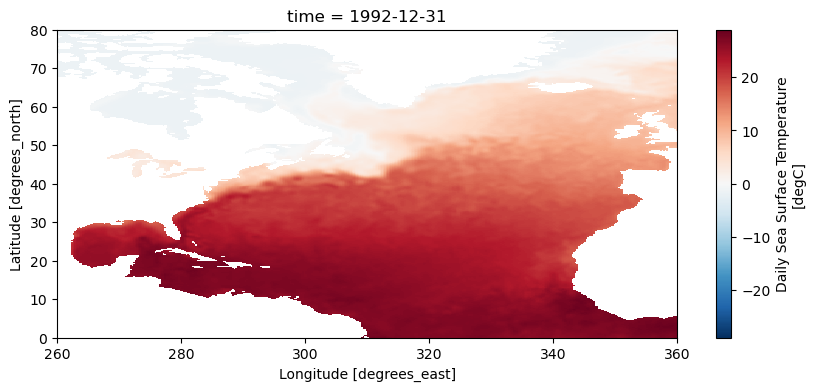

In [25]:
sst[-1,:,:].plot()